In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
import math
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

##1.EDA



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **確認變數型態**

object 類別
other 連續

In [ ]:
# 查看DataFrame的基本信息
info = train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# 變數分類 => 分為「類別型態」跟「連續型態」
object_variables = train.select_dtypes(include='object')
numeric_variables = train.select_dtypes(include=['int64', 'float64'])
print('類別變數: \n', object_variables.columns)
print('連續變數: \n', numeric_variables.columns)

類別變數: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
連續變數: 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 

## **各變數 NA 數量**

Text(0, 0.5, 'Number of NA')

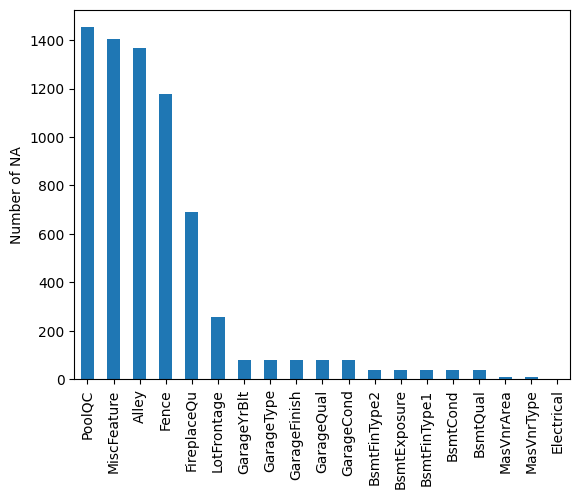

In [ ]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True) # 排序讓畫出來的圖更好讀
missing.plot.bar().invert_xaxis() # 翻轉x軸讓NA數量最多的變數在右邊
plt.ylabel("Number of NA")

## **房價自己**

Text(0.5, 1.0, 'Histogram of SalePrice')

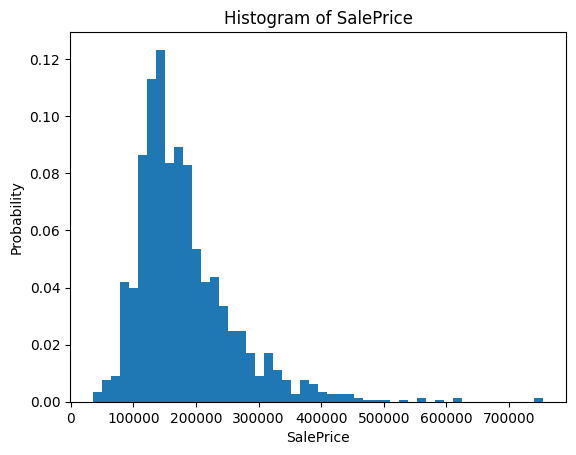

In [ ]:
price = train['SalePrice']
HIST_BINS = np.linspace(min(price), max(price), 100)

pro = np.ones_like(price)/float(len(price))

plt.hist(price, 50, weights=pro)
plt.xlabel("SalePrice")
plt.ylabel("Probability")
plt.title("Histogram of SalePrice")

Text(0.5, 1.0, 'Box Plot of SalePrice')

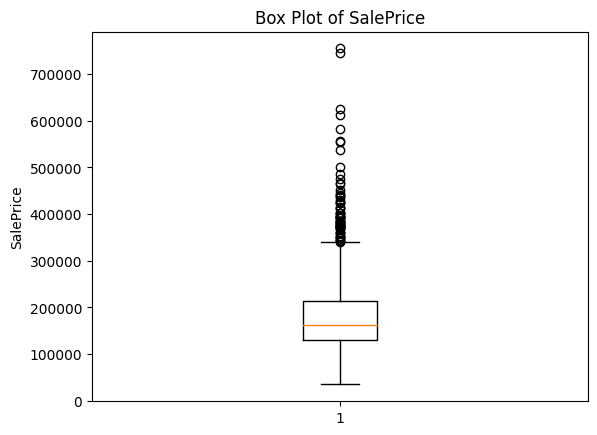

In [ ]:
plt.boxplot(price)
plt.ylabel("SalePrice")
plt.title("Box Plot of SalePrice")

In [ ]:
statistic, p_value = stats.shapiro(price)

# 输出结果
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test:
Statistic: 0.869672954082489
p-value: 3.2072044604461286e-33


## **類別型資料敘述統計**

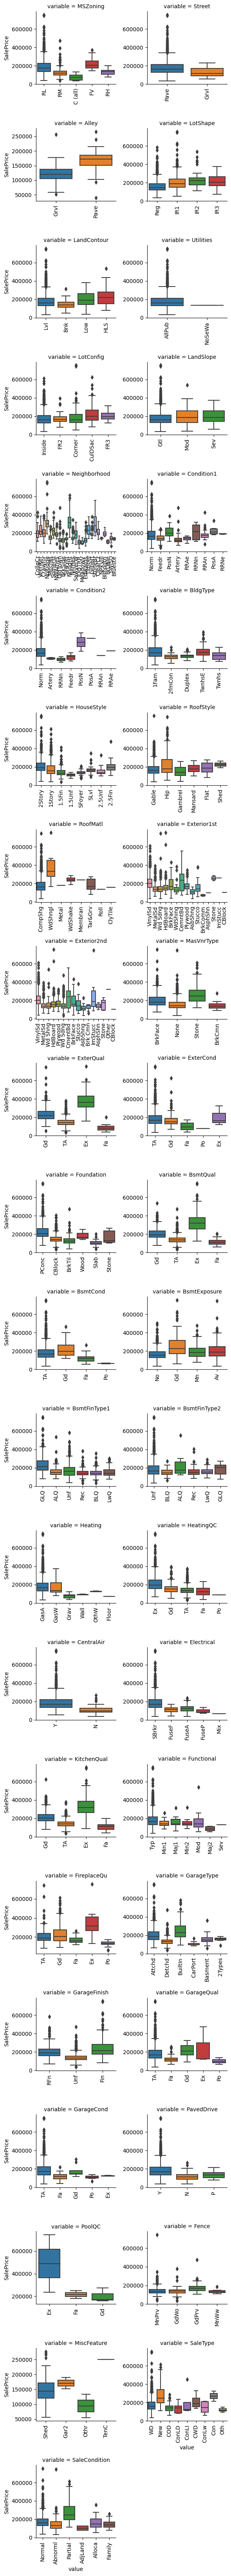

In [ ]:
# for c in object_variables:
#     train[c] = train[c].astype('category')
#     if train[c].isnull().any():
#         train[c] = train[c].cat.add_categories(['MISSING'])
#         train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=object_variables)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

## **連續型態變數**

In [ ]:
int_variable = numeric_variables.select_dtypes(include=['int64'])

<ipython-input-17-9667e183c1f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[variable][i] = round(train[variable][i])


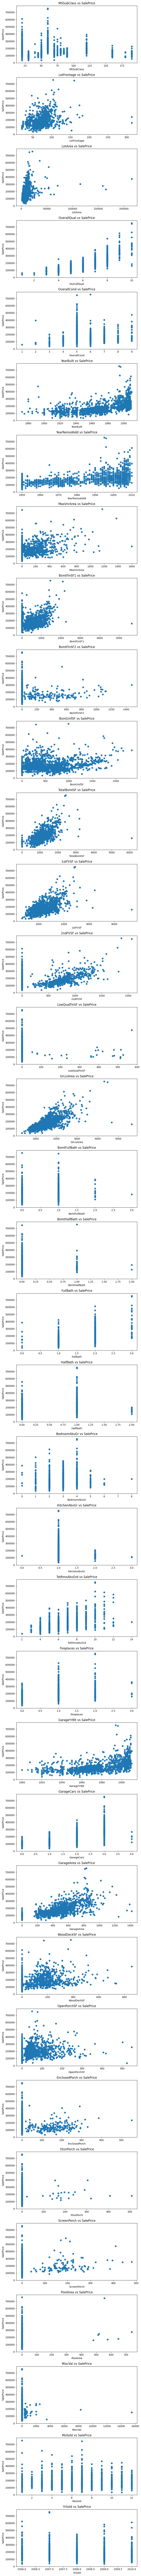

In [ ]:
# 為了畫散佈圖，暫時把float四捨五入
for variable in numeric_variables.columns:
    if train[variable].dtype == 'float64':
        for i in range(len(train[variable])):
            if math.isnan(train[variable][i]) != True:
                train[variable][i] = round(train[variable][i])


# 取得所有欄位名稱，除了SalesPrice
columns = numeric_variables.columns.tolist()
columns.remove('SalePrice')
columns.remove('Id')

# 設定子圖的行和列數
num_rows = len(columns)
num_cols = 1

# 設定圖形的尺寸
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*4))

# 迭代每個變數，繪製散佈圖
for i, col in enumerate(columns):
    ax = axes[i] if num_rows > 1 else axes

    # 繪製散佈圖
    ax.scatter(train[col], train['SalePrice'])

    # 設定標題和軸標籤
    ax.set_title(f"{col} vs SalePrice")
    ax.set_xlabel(col)
    ax.set_ylabel("SalePrice")

# 調整子圖之間的間距
plt.tight_layout()

# 顯示圖形
plt.show()

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/ColabNotebooks/管理科學/final/house-prices-advanced-regression-techniques

In [ ]:
#ls

In [ ]:
# reading the dataset
train = pd.read_csv("/content/drive/Shareddrives/管理科學/final/code/data/train.csv")
test = pd.read_csv("/content/drive/Shareddrives/管理科學/final/code/data/test.csv")

## 2. Data Cleaning

In [ ]:
train.isnull().sum()  #checking the number of null values in the dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
# Checking the percentage of missing values
round(100*(train.isnull().sum()/len(train.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

## Null value treatment
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the domain understanding and the data dictionary provided with the data.

In [ ]:
train.shape

(1460, 81)

In [ ]:
train = pd.concat((train,test))

In [ ]:
#NA in A column means No A, so we will replace NA by it.
train['Alley'].fillna('No Alley', inplace=True)
train['MasVnrType'].fillna('None', inplace=True)
train['FireplaceQu'].fillna('No Fireplace', inplace=True)
train['PoolQC'].fillna('No Pool', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['LotFrontage'].fillna(0, inplace=True)

train['GarageType'].fillna('No Garage', inplace=True)
train['GarageFinish'].fillna('No Garage', inplace=True)
train['GarageQual'].fillna('No Garage', inplace=True)
train['GarageCond'].fillna('No Garage', inplace=True)


In [ ]:
round(100*(train['MiscFeature'].isnull().sum()/len(train['MiscFeature'].index)), 2)

96.4

In [ ]:
# MiscFeature column has almost 96% null values so we will drop it
train= train.drop('MiscFeature', axis=1)

In [ ]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [ ]:
#converting year to number of years
train['YearBuilt'] = 2019 - train['YearBuilt']
train['YearRemodAdd'] = 2019 - train['YearRemodAdd']
train['GarageYrBlt'] = 2019 - train['GarageYrBlt']
train['YrSold'] = 2019 - train['YrSold']

In [ ]:
#converting from int type to object to treat the variables as categorical variables
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train['BsmtFullBath'] = train['BsmtFullBath'].astype('object')
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype('object')
train['FullBath'] = train['FullBath'].astype('object')
train['HalfBath'] = train['HalfBath'].astype('object')
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype('object')
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype('object')
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].astype('object')
train['Fireplaces'] = train['Fireplaces'].astype('object')
train['GarageCars'] = train['GarageCars'].astype('object')

In [ ]:
train.shape

(2919, 80)

In [ ]:
final = train

## Dummy Variables

In [ ]:
# Defining the map function
def street_binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

def utilities_binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

def centralAirbinary_map(x):
    return x.map({'Y': 1, "N": 0})

In [ ]:
final[['Street']] = final[['Street']].apply(street_binary_map)

final[['Utilities']] = final[['Utilities']].apply(utilities_binary_map)

final[['CentralAir']] = final[['CentralAir']].apply(centralAirbinary_map)

## Data Preparation

In [ ]:
# split into X and y
X = final.drop([ 'Id'], axis=1)


In [ ]:
# creating dummy variables for categorical variables

# subset all categorical variables
train_categorical = X.select_dtypes(include=['object'])
train_categorical.head()


MSSubClass MSZoning     Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL  No Alley      Reg         Lvl    Inside       Gtl   
1         20       RL  No Alley      Reg         Lvl       FR2       Gtl   
2         60       RL  No Alley      IR1         Lvl    Inside       Gtl   
3         70       RL  No Alley      IR1         Lvl    Corner       Gtl   
4         60       RL  No Alley      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... GarageType GarageFinish GarageCars  \
0      CollgCr       Norm       Norm  ...     Attchd          RFn        2.0   
1      Veenker      Feedr       Norm  ...     Attchd          RFn        2.0   
2      CollgCr       Norm       Norm  ...     Attchd          RFn        2.0   
3      Crawfor       Norm       Norm  ...     Detchd          Unf        3.0   
4      NoRidge       Norm       Norm  ...     Attchd          RFn        3.0   

  GarageQual GarageCond PavedDrive   PoolQC     Fence SaleType SaleCondition  
0         TA         TA          Y  No Pool  No Fence       WD        Normal  
1         TA         TA          Y  No Pool  No Fence       WD        Normal  
2         TA         TA          Y  No Pool  No Fence       WD        Normal  
3         TA         TA          Y  No Pool  No Fence       WD       Abnorml  
4         TA         TA          Y  No Pool  No Fence       WD        Normal  

[5 rows x 51 columns]

In [ ]:
# convert into dummies
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

<ipython-input-23-6dab76da5105>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_dummies = pd.get_dummies(train_categorical, drop_first=True)
<ipython-input-23-6dab76da5105>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_dummies = pd.get_dummies(train_categorical, drop_first=True)
<ipython-input-23-6dab76da5105>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_dummies = pd.get_dummies(train_categorical, drop_first=True)
<ipython-input-23-6dab76da5105>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_dummies = pd.get_dummies(train_categorical, d

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 286 columns]

In [ ]:
# drop categorical variables
final = final.drop(list(train_categorical.columns), axis=1)

# concat dummy variables with X
final = pd.concat([final, train_dummies], axis=1)

In [ ]:
final.shape

(2919, 315)

In [ ]:
test = final.tail(1459)

In [ ]:
test.shape

(1459, 315)

In [ ]:
X = final.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

<ipython-input-28-74ae85b330ec>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop("SalePrice",1) # take out the target variable


In [ ]:
test = test.fillna(test.interpolate())
X = X.fillna(X.interpolate())

In [ ]:
test = test.drop("SalePrice",1) # take out the target variable

<ipython-input-30-96dbbf500474>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop("SalePrice",1) # take out the target variable


In [ ]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)

StandardScaler()

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                train_size=0.7,
                                test_size = 0.3, random_state=100)

## Build Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.129445      0.022390         0.004980        0.001497      0.0001   
1        0.041751      0.010626         0.004329        0.000131       0.001   
2        0.021577      0.003797         0.007460        0.001705        0.01   
3        0.078844      0.033314         0.006779        0.002593        0.05   
4        0.033650      0.006164         0.006351        0.001931         0.1   
5        0.039703      0.015489         0.004749        0.001522         0.2   
6        0.030835      0.017010         0.005003        0.001585         0.3   
7        0.038645      0.012125         0.006316        0.001650         0.4   
8        0.034129      0.016266         0.005498        0.001829         0.5   
9        0.031260      0.015346         0.006280        0.001843         0.6   
10       0.029581      0.014053         0.004720        0.001586         0.7   
11       0.031212      0.013195         0.006944        0.001599         0.8   
12       0.037286      0.007399         0.007398        0.001869         0.9   
13       0.031658      0.011940         0.008356        0.002797         1.0   
14       0.025083      0.005556         0.009841        0.001928         2.0   
15       0.021958      0.002396         0.007969        0.001244         3.0   
16       0.020435      0.001074         0.005201        0.001727         4.0   
17       0.016031      0.003503         0.006490        0.003181         5.0   
18       0.014082      0.004590         0.006194        0.002703         6.0   
19       0.016146      0.005301         0.006362        0.001956         7.0   
20       0.016150      0.003686         0.007029        0.002785         8.0   
21       0.015304      0.005416         0.006627        0.001775         9.0   
22       0.017999      0.000633         0.006812        0.000786        10.0   
23       0.020210      0.002743         0.006665        0.001464          20   
24       0.016532      0.003064         0.036041        0.054865          50   
25       0.008128      0.000664         0.003735        0.000119         100   
26       0.012148      0.006036         0.005170        0.001798         500   
27       0.018668      0.004537         0.006543        0.002651        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.098977          -0.088046   
1    {'alpha': 0.001}          -0.101995          -0.082101   
2     {'alpha': 0.01}          -0.127572          -0.109350   
3     {'alpha': 0.05}          -0.129530          -0.110460   
4      {'alpha': 0.1}          -0.128235          -0.109700   
5      {'alpha': 0.2}          -0.127164          -0.109059   
6      {'alpha': 0.3}          -0.127270          -0.108381   
7      {'alpha': 0.4}          -0.127734          -0.108328   
8      {'alpha': 0.5}          -0.128229          -0.108946   
9      {'alpha': 0.6}          -0.128885          -0.109677   
10     {'alpha': 0.7}          -0.129754          -0.110473   
11     {'alpha': 0.8}          -0.130899          -0.111303   
12     {'alpha': 0.9}          -0.132248          -0.112421   
13     {'alpha': 1.0}          -0.133939          -0.113867   
14     {'alpha': 2.0}          -0.153098          -0.126505   
15     {'alpha': 3.0}          -0.168453          -0.140368   
16     {'alpha': 4.0}          -0.169619          -0.142347   
17     {'alpha': 5.0}          -0.170989          -0.143778   
18     {'alpha': 6.0}          -0.172197          -0.145428   
19     {'alpha': 7.0}          -0.173395          -0.147121   
20     {'alpha': 8.0}          -0.174353          -0.148667   
21     {'alpha': 9.0}          -0.175099          -0.150071   
22    {'alpha': 10.0}          -0.175884          -0.151651   
23      {'alpha': 20}          -0.187781          -0.171804   
24      {'alpha': 50}          -0.224412          -0.212157   
25     {'alpha': 100}          -0.281424     

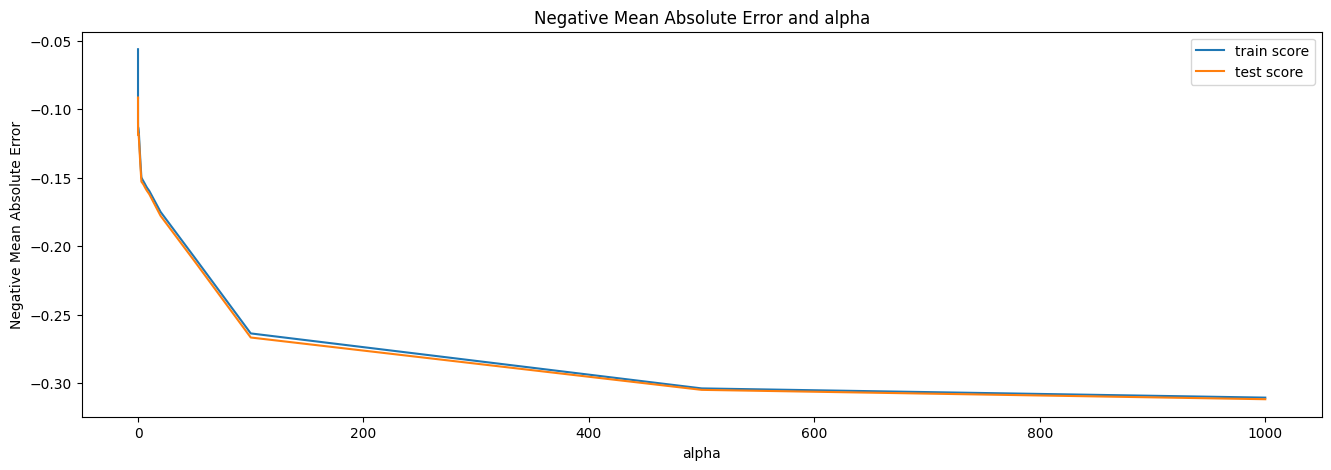

In [ ]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# 取得 cross validation 的平均準確率及標準差
means = cv_results['mean_test_score']
stds = cv_results['std_test_score']
params = cv_results['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean}, 標準差: {stdev}, 參數組合: {param}")

# checking the value of optimum number of parameters
print(f"最佳準確率: {model_cv.best_score_}，最佳參數組合：{model_cv.best_params_}")

平均準確率: -0.09148216009985963, 標準差: 0.004620006477691179, 參數組合: {'alpha': 0.0001}
平均準確率: -0.091158641352624, 標準差: 0.008660140335964489, 參數組合: {'alpha': 0.001}
平均準確率: -0.11658566564141844, 標準差: 0.011445027674000388, 參數組合: {'alpha': 0.01}
平均準確率: -0.11859453231371533, 標準差: 0.011403516132260703, 參數組合: {'alpha': 0.05}
平均準確率: -0.1181702464715065, 標準差: 0.01108264569751649, 參數組合: {'alpha': 0.1}
平均準確率: -0.11758328052832627, 標準差: 0.010682008914306136, 參數組合: {'alpha': 0.2}
平均準確率: -0.11749665828640192, 標準差: 0.010893597084399693, 參數組合: {'alpha': 0.3}
平均準確率: -0.11789166467859538, 標準差: 0.011002650224289166, 參數組合: {'alpha': 0.4}
平均準確率: -0.1186274846394583, 標準差: 0.010940357685069527, 參數組合: {'alpha': 0.5}
平均準確率: -0.119510188598734, 標準差: 0.010853691686614016, 參數組合: {'alpha': 0.6}
平均準確率: -0.120502196999613, 標準差: 0.01079374824764904, 參數組合: {'alpha': 0.7}
平均準確率: -0.1217269675024693, 標準差: 0.010780947934846102, 參數組合: {'alpha': 0.8}
平均準確率: -0.12311648109437774, 標準差: 0.010625595162701684, 參數組合: {'alpha': 0.9}
平均準

由上可知應選擇最佳參數組合alpha=0.001作為要放進Lasso的參數，因為alpha=0.001時平均準確率表現最好

In [ ]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9283521671511619


In [ ]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8934897469971324


In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.017195427594137128


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print ('MAPE is: \n', mean_absolute_percentage_error(y_test, y_test_pred))

MAPE is: 
 0.0070937218771954125


In [ ]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(test)
final_predictions = np.exp(preds)

In [ ]:
result = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions })

In [ ]:
result

Id      SalePrice
0        0  117571.904925
1        1  155045.394690
2        2  193707.341869
3        3  208167.468448
4        4  195265.816808
...    ...            ...
1454  1454   92799.773322
1455  1455   88739.078784
1456  1456  173950.130423
1457  1457  131180.000416
1458  1458  233646.178437

[1459 rows x 2 columns]

In [ ]:
## features selected

lasso_coef = lasso.coef_

feature_coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_coef})

## selected features not zero
selected_features = feature_coef_df[feature_coef_df['Coefficient'] != 0]['Feature']

## result
print("Feature choosed:")
print(selected_features)

Feature choosed:
0                         Id
1                LotFrontage
2                    LotArea
5                  YearBuilt
6               YearRemodAdd
               ...          
293             PavedDrive_Y
306             SaleType_New
308              SaleType_WD
312     SaleCondition_Normal
313    SaleCondition_Partial
Name: Feature, Length: 110, dtype: object


In [ ]:
pd.set_option("display.max_rows",None)
selected_features

0                            Id
1                   LotFrontage
2                       LotArea
5                     YearBuilt
6                  YearRemodAdd
7                    MasVnrArea
8                    BsmtFinSF1
9                    BsmtFinSF2
10                    BsmtUnfSF
11                  TotalBsmtSF
12                   CentralAir
13                     1stFlrSF
14                     2ndFlrSF
15                 LowQualFinSF
16                    GrLivArea
17                  GarageYrBlt
18                   GarageArea
19                   WoodDeckSF
20                  OpenPorchSF
21                EnclosedPorch
22                    3SsnPorch
23                  ScreenPorch
24                     PoolArea
25                      MiscVal
26                       MoSold
27                       YrSold
28                MSSubClass_30
40               MSSubClass_160
43                  MSZoning_FV
45                  MSZoning_RL
47               Alley_No Alley
49      

##Summary

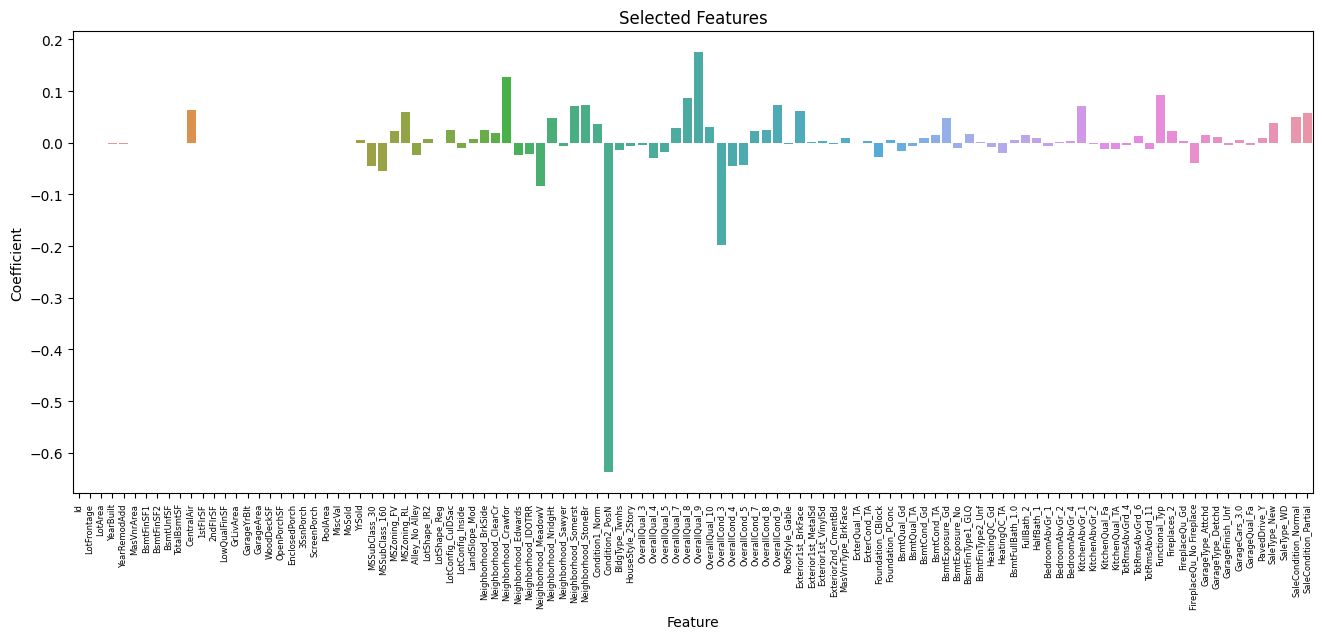

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

sns.barplot(x='Feature', y='Coefficient', data=feature_coef_df[feature_coef_df['Coefficient'] != 0])

plt.title("Selected Features")
plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.xticks(rotation=90, fontsize=6)

plt.show()

In [ ]:
# dataframe only with selected feature
f1 = final.loc[:,selected_features]
f1

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0        1         65.0     8450         16            16       196.0   
1        2         80.0     9600         43            43         0.0   
2        3         68.0    11250         18            17       162.0   
3        4         60.0     9550        104            49         0.0   
4        5         84.0    14260         19            19       350.0   
...    ...          ...      ...        ...           ...         ...   
1454  2915         21.0     1936         49            49         0.0   
1455  2916         21.0     1894         49            49         0.0   
1456  2917        160.0    20000         59            23         0.0   
1457  2918         62.0    10441         27            27         0.0   
1458  2919         74.0     9627         26            25        94.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageType_Attchd  \
0          706.0         0.0      150.0        856.0  ...                  1   
1          978.0         0.0      284.0       1262.0  ...                  1   
2          486.0         0.0      434.0        920.0  ...                  1   
3          216.0         0.0      540.0        756.0  ...                  0   
4          655.0         0.0      490.0       1145.0  ...                  1   
...          ...         ...        ...          ...  ...                ...   
1454         0.0         0.0      546.0        546.0  ...                  0   
1455       252.0         0.0      294.0        546.0  ...                  0   
1456      1224.0         0.0        0.0       1224.0  ...                  0   
1457       337.0         0.0      575.0        912.0  ...                  0   
1458       758.0         0.0      238.0        996.0  ...                  1   

      GarageType_Detchd  GarageFinish_Unf  GarageCars_3.0  GarageQual_Fa  \
0                     0                 0               0              0   
1                     0                 0               0              0   
2                     0                 0               0              0   
3                     1                 1               1              0   
4                     0                 0               1              0   
...                 ...               ...             ...            ...   
1454                  0                 0               0              0   
1455                  0                 1               0              0   
1456                  1                 1               0              0   
1457                  0                 0               0              0   
1458                  0                 0               1              0   

      PavedDrive_Y  SaleType_New  SaleType_WD  SaleCondition_Normal  \
0                1             0            1                     1   
1                1             0            1                     1   
2                1             0            1                     1   
3                1             0            1                     0   
4                1             0            1                     1   
...            ...           ...          ...                   ...   
1454             1             0            1                     1   
1455             1             0            1                     0   
1456             1             0            1                     0   
1457             1             0            1                     1   
1458             1             0            1                     1   

      SaleCondition_Partial  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
1454                      0  
1455                      0  
1456                      0  
1457                      0  
1458                      0  

[2919 rows x 110 columns]

###relationships between selected feature

<Axes: >

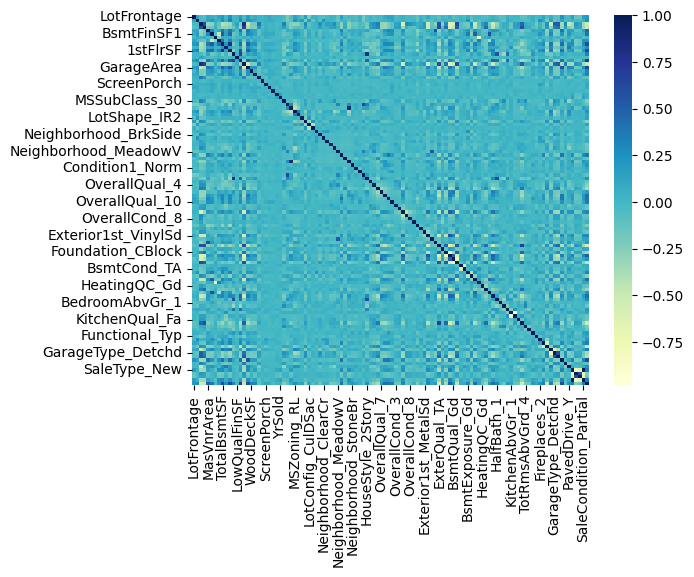

In [ ]:
quantitative = [f for f in f1.columns if f1.dtypes[f] != 'object']
quantitative.remove('Id')
corr = final[quantitative+['SalePrice']].corr()
sns.heatmap(corr,cmap="YlGnBu")

In [ ]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",10)
corr

LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
LotFrontage               1.000000  0.135246  -0.027906     -0.070162   
LotArea                   0.135246  1.000000  -0.024128     -0.021612   
YearBuilt                -0.027906 -0.024128   1.000000      0.612235   
YearRemodAdd             -0.070162 -0.021612   0.612235      1.000000   
MasVnrArea                0.108969  0.124728  -0.307520     -0.191668   
...                            ...       ...        ...           ...   
SaleType_New              0.165565  0.031601  -0.343880     -0.325597   
SaleType_WD              -0.135669 -0.014035   0.203944      0.156491   
SaleCondition_Normal     -0.139704 -0.022898   0.137934      0.102889   
SaleCondition_Partial     0.165680  0.033434  -0.339458     -0.323272   
SalePrice                 0.209624  0.263843  -0.522897     -0.507101   

                       MasVnrArea  ...  SaleType_New  SaleType_WD  \
LotFrontage              0.108969  ...      0.165565    -0.135669   
LotArea                  0.124728  ...      0.031601    -0.014035   
YearBuilt               -0.307520  ...     -0.343880     0.203944   
YearRemodAdd            -0.191668  ...     -0.325597     0.156491   
MasVnrArea               1.000000  ...      0.147923    -0.092637   
...                           ...  ...           ...          ...   
SaleType_New             0.147923  ...      1.000000    -0.755987   
SaleType_WD             -0.092637  ...     -0.755987     1.000000   
SaleCondition_Normal    -0.065257  ...     -0.643684     0.620346   
SaleCondition_Partial    0.145046  ...      0.986573    -0.751813   
SalePrice                0.472614  ...      0.357509    -0.242598   

                       SaleCondition_Normal  SaleCondition_Partial  SalePrice  
LotFrontage                       -0.139704               0.165680   0.209624  
LotArea                           -0.022898               0.033434   0.263843  
YearBuilt                          0.137934              -0.339458  -0.522897  
YearRemodAdd                       0.102889              -0.323272  -0.507101  
MasVnrArea                        -0.065257               0.145046   0.472614  
...                                     ...                    ...        ...  
SaleType_New                      -0.643684               0.986573   0.357509  
SaleType_WD                        0.620346              -0.751813  -0.242598  
SaleCondition_Normal               1.000000              -0.652444  -0.153990  
SaleCondition_Partial             -0.652444               1.000000   0.352060  
SalePrice                         -0.153990               0.352060   1.000000  

[110 rows x 110 columns]

There are many strong correlations between variables.

For example:

1stFlrSF is strongly correlated with TotalBsmtSF.

YearBuilt is negatively correlated with Foundation_PConc

###Pairplots
It also would be useful to see how sale price compares to each selected feature.

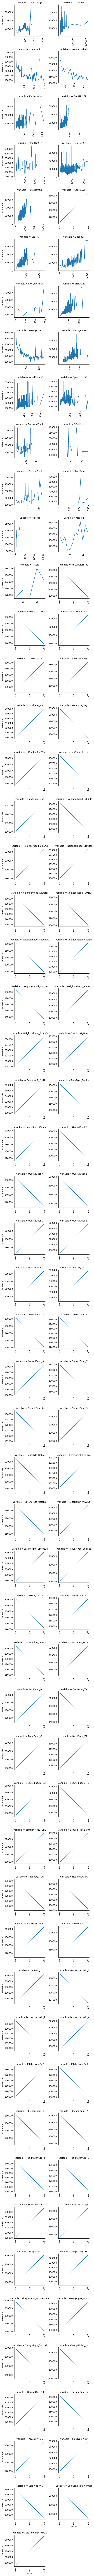

In [ ]:
qualitative = [f for f in f1.columns if f1.dtypes[f] == 'object']

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()

    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

qual_encoded = []
for q in qualitative:
    encode(f1, q)
    qual_encoded.append(q+'_E')

def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

f = pd.melt(final, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(pairplot, "value", "SalePrice")

Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF look like they would benefit from adding quadratic term to regression.

In [ ]:
## alpha
best_params = model_cv.best_params_

## score
best_score = model_cv.best_score_

# r-squre and RMSE for train data
train_r2 = metrics.r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# r-squre and RMSE for test data
test_r2 = metrics.r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)


# result
result_df = pd.DataFrame({'Id': test.index, 'SalePrice': final_predictions})

# print all result
print("Best parameter combination selected by the model:")
print(best_params)
print("\nBest score (Negative Mean Absolute Error):")
print(best_score)
print("\nPerformance evaluation on the training set:")
print("R-squared value: {:.4f}".format(train_r2))
print("RMSE: {:.4f}".format(train_rmse))
print("MAPE: {:.4f}".format(train_mape))
print("\nPerformance evaluation on the test set:")
print("R-squared value: {:.4f}".format(test_r2))
print("RMSE: {:.4f}".format(test_rmse))
print("MAPE: {:.4f}".format(test_mape))

pd.set_option("display.max_rows",10)
print("\nFinal predictions:")
print(result_df)


Best parameter combination selected by the model:
{'alpha': 0.001}

Best score (Negative Mean Absolute Error):
-0.091158641352624

Performance evaluation on the training set:
R-squared value: 0.9284
RMSE: 0.1070
MAPE: 0.0062

Performance evaluation on the test set:
R-squared value: 0.8935
RMSE: 0.1311
MAPE: 0.0071

Final predictions:
        Id      SalePrice
0        0  117571.904925
1        1  155045.394690
2        2  193707.341869
3        3  208167.468448
4        4  195265.816808
...    ...            ...
1454  1454   92799.773322
1455  1455   88739.078784
1456  1456  173950.130423
1457  1457  131180.000416
1458  1458  233646.178437

[1459 rows x 2 columns]


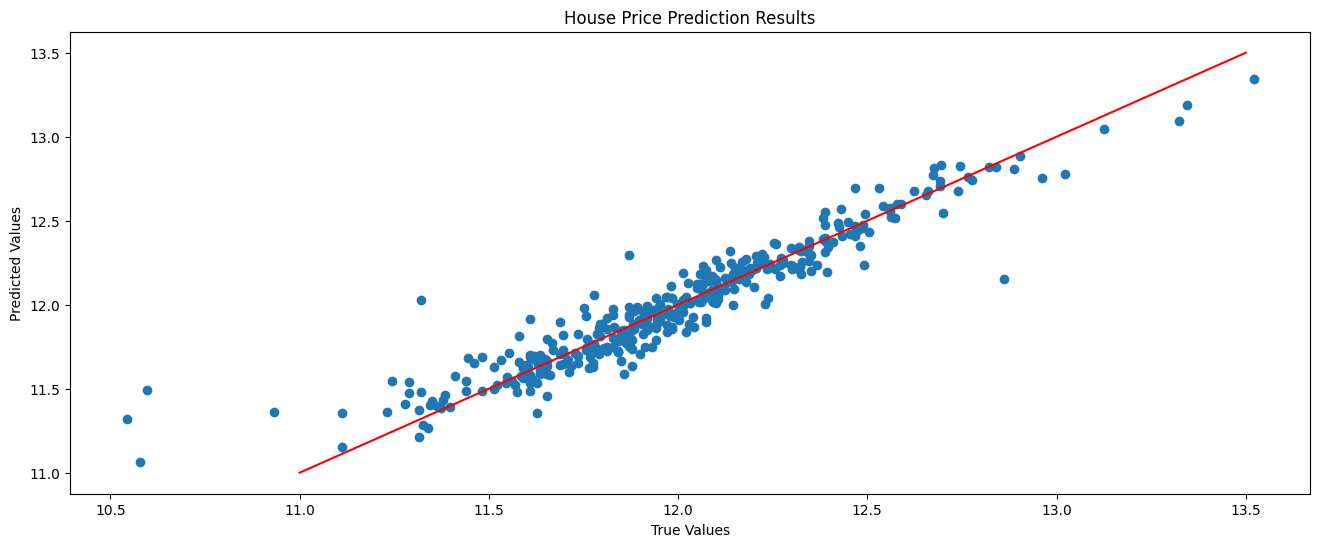

In [ ]:
plt.figure(figsize=(16, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("House Price Prediction Results")
x_start, y_start = 11, 11
x_end, y_end = 13.5, 13.5
plt.plot([x_start, x_end], [y_start, y_end], 'r-')
plt.show()